In [1]:
from ego_solver import EGO
import numpy as np
from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib notebook
pal = sns.color_palette('Dark2', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)
sns.set_style('ticks')

<IPython.core.display.Javascript object>


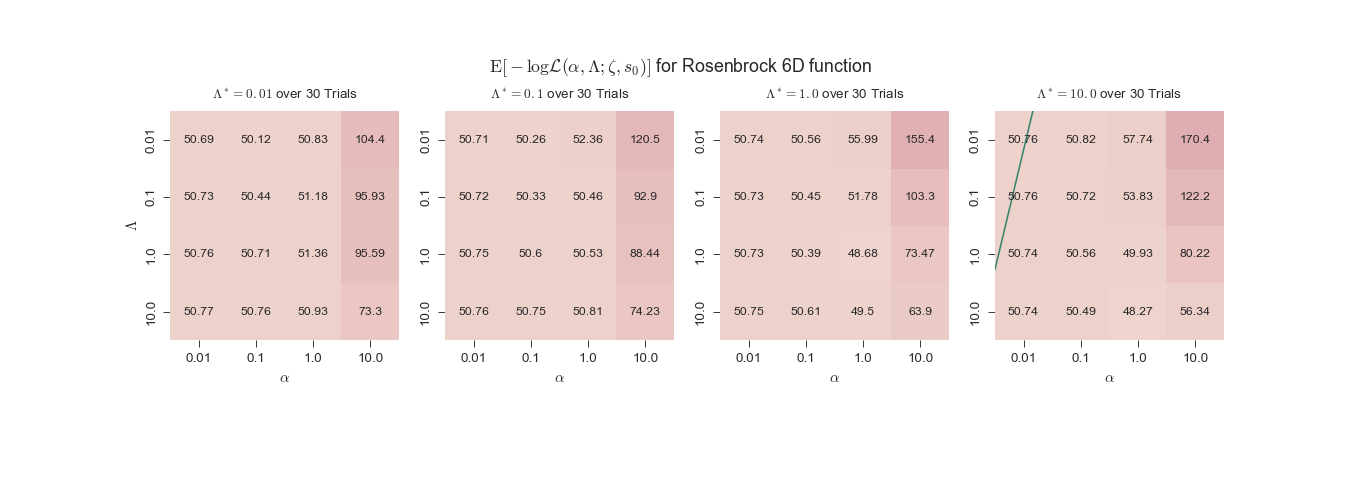

50.1157666667 104.388766667
50.2596666667 120.497266667
48.6758333333 155.3859
48.2734 170.371266667


In [31]:
sig_scale = np.array([0.01, 0.1, 1., 10.])
alpha_set = np.array([0.01, 0.1, 1., 10.])
# alpha_set = np.array([1e-5, 1e-4, 1e-3, 1e-2])

# data = np.loadtxt('all_10_trials_branin.txt').reshape((30,4,4))

c_m = sns.cubehelix_palette(as_cmap=True, light=1)

norm = colors.LogNorm(vmin=10., vmax=1e5)
s_m = cm.ScalarMappable(cmap=c_m, norm=norm)
#     norm.autoscale(X)
s_m.set_array([])


import matplotlib.colors as colors
import matplotlib.cm

def heat_plot(data, sig, ax=None):
    if ax is None:
        f, ax = plt.subplots( figsize=(12,4))
    X = -data.mean(axis=0)
    print np.min(X), np.max(X)
    
    
    
    hmap = sns.heatmap(X,
                xticklabels=alpha_set, yticklabels=sig_scale, cmap=c_m, 
               robust=False, annot=True, ax=ax, square=True, cbar=False,
                annot_kws={"size": 11}, fmt='.4g', norm=norm, vmin=10., vmax=1e5)
    ax.set_xlabel(r'$\alpha$')
    
#     ax[0].set_title(r'$\mathrm{E}[-\log {\cal L}(\Sigma^{-1}_{test}|\Sigma^{-1},\alpha)]$')

#     for y in range(data.mean(axis=0).shape[0]):
#         for x in range(data.mean(axis=0).shape[1]):
#             ax.text(x + 0.5, y + 0.2, '[ {:.1e} ]'.format( data.std(axis=0)[-y-1, x]),
#                      horizontalalignment='center',
#                      verticalalignment='center', color='gray'
#                      )
    
    # f.suptitle('BO Paramter estimation for Branin \n True $\Sigma^{-1}=0.01$ over 30 Trials', 
    #            y=1.1, fontsize=12)
    ax.set_title('$\Lambda^*='+str(sig)+'$ over 30 Trials', 
               y=1.03, fontsize=12)
# cbar_ax = f.axes[-1]
# cbar_ax.set_ylabel('-log likelihood')
# plt.showw()
names=['0.01','0.1','1.0','10.0']





f,ax = plt.subplots(ncols=4, figsize=(17,6))
for n,i in enumerate(names):
    data = np.loadtxt('./branin_ML/all'+i+'branin_11iter_9init.txt').reshape((30,4,4))
    heat_plot(data, sig_scale[n], ax=ax[n])
title=r'$\mathrm{E}[-\log {\cal L}(\alpha,\Lambda;\zeta,s_0)]$'+\
               ' for Rosenbrock 6D function'

f.get_axes()[0].annotate(title, (0.5, 0.85), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
f.get_axes()[0].set_ylabel(r'$\Lambda$')
# f.colorbar(s_m, orientation='horizontal', ax = f.get_axes(), fraction=0.075)

plt.subplots_adjust(top=0.8, bottom=.26)
plt.subplots_adjust()
# plt.tight_layout()
# f.colorbar()

In [10]:
i='0.1'
data = np.loadtxt('./rosen6_ML/all_'+i+'_trials_rosen6_25iter.txt').reshape((30,4,4))

In [18]:
data[:,1,:]

array([[-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-46.151, -46.151, -46.151, -46.151],
       [-4

## Below is for $L_{\rm EGO}$

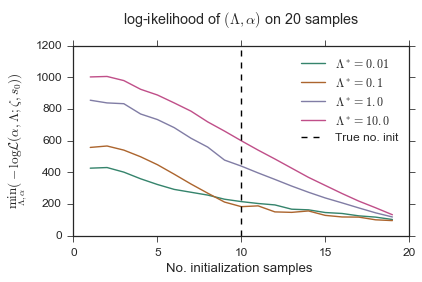

In [273]:
# approximate lhs and random likelihood (deprecated)
lhs_like = np.vectorize(lambda n,p,l: p*np.log(np.math.factorial(n)) + p*n*np.log(l/float(n)))
uni_like = np.vectorize(lambda n,p,l: n*p*np.log(l))

#which samples to use for true data
inits = np.arange(1,20)

def get_L(lam):
    inits = np.arange(1,20)
    Ls = np.zeros_like(inits)
    for n,i in enumerate(inits):
        fname='./branin_ML/sample_study/all{}branin_20iter_{:d}init.txt'.format(lam,i)
        data = np.loadtxt(fname).reshape((30,4,4))
        Ls[n] = -data.mean(axis=0).min()
    return Ls
# plt.plot(inits,lhs_like(inits,2,15))
# plt.plot(inits,uni_like(inits,2,15))
# print get_L(10.)
pal = sns.color_palette('Dark2', n_colors=4, desat=.6)
sns.set_palette(pal)

for nam in names:
    plt.plot(inits, get_L(nam), label=r'$\Lambda^*={}$'.format(nam))
plt.ylabel(r'$\min_{\Lambda,\alpha}(-\log {\cal L}(\alpha,\Lambda;\zeta,s_0))$')
plt.xlabel('No. initialization samples ')
plt.axvline(10, color='k',ls='--',label='True no. init')
plt.title(r'log-ikelihood of $(\Lambda,\alpha)$ on 20 samples'+'\n')
plt.legend(loc=0)
plt.tight_layout()

## Below is for $L_{{\rm ini}}$

(2L, 20L, 30L) (1L, 20L, 30L)
(30L, 18L)


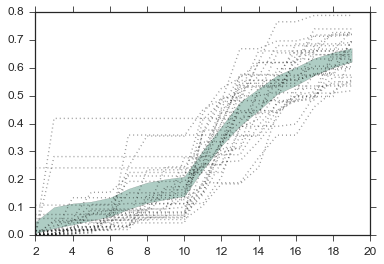

In [499]:
file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)
true_lam = 1
## dat['solution'][true_lam, coor_or_ei, no_samples]
solution_X = np.dstack([i[true_lam][0][:20,:].T for i in dat['solution']])
solution_y = np.dstack([i[true_lam][1][:20] for i in dat['solution']])

print solution_X.shape, solution_y.shape
# print solution[0,0,1].shape
# solution_X[1,:10,0]

# %matplotlib inline

## solution_X[dimension, sample, trial]
# plt.plot(solution_X[0,:10,0],solution_X[1,:10,0], marker='o', ls='--');

from scipy.spatial.distance import pdist, cdist, squareform
from pyDOE import lhs
from scipy.misc import logsumexp
import scikits.bootstrap as boot  

# print pdist(solution_X[:,:2,0].T)
E_true = np.array([[pdist(solution_X[:,:i,j].T).min() for i in range(2,20)] for j in range(30)])
# solution_X[:][0].shape
# dat['solution']
print E_true.shape
plt.plot(range(2,20), np.exp(-E_true).T, color='k', alpha=.4, ls=':')

# print tuple([i for i in np.exp(-E_true)])

lo_hi = np.zeros((18,2))
for n,i in enumerate(range(2,20)):
    lo_hi[n] = boot.ci(np.exp(-E_true[:,n]), np.mean, alpha=.05)
# print lo_hi
plt.fill_between(range(2,20), lo_hi[:,0],lo_hi[:,1], alpha=.4)

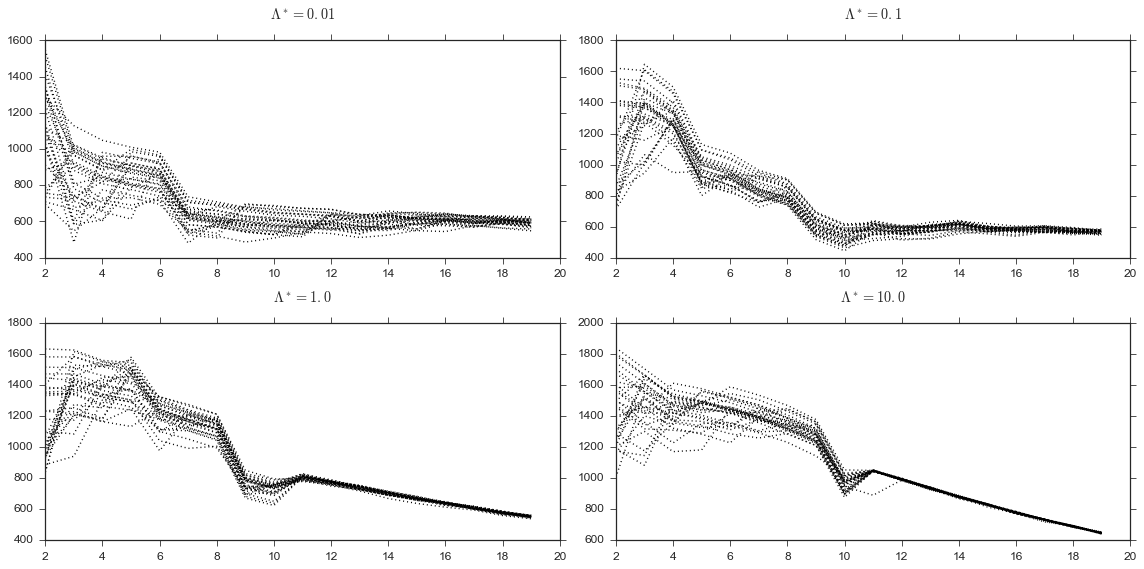

In [510]:
file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

names=['0.01','0.1','1.0','10.0']

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
for lam_no, ax in enumerate(axes.flatten()):
    true_lam = lam_no
    l_ego = get_L(names[true_lam])[1:]
    ax.set_title('$\Lambda^*={}$\n'.format(names[true_lam]))
    
    ## dat['solution'][true_lam, coor_or_ei, no_samples]
    solution_X = np.dstack([i[true_lam][0][:20,:].T for i in dat['solution']])
    solution_y = np.dstack([i[true_lam][1][:20] for i in dat['solution']])
    
    E_true = np.array([[pdist(solution_X[:,:i,j].T).min() for i in range(2,20)] for j in range(30)])

    bounds = np.array([[-5, 10], [0, 15]])  # for branin
    t_samp = range(2,20)
    p = np.zeros_like(t_samp) # initialize
    alpha = 80.
    # for test in range(10):
    for trial in range(30):
        for n,tr in enumerate(t_samp):
            true_set = solution_X[:,:tr, 0].T
            bounds = np.array([[-5, 10], [0, 15]])  # for branin
        #     samples = lhs(2, 100) 
            samples = np.random.uniform(size=(10000,2))
            samples = samples*(bounds[:, 1]-bounds[:, 0])+bounds[:, 0]
            E_samp = (cdist(true_set[:-1],samples).min(axis=0))
            log_prob = alpha*E_true[trial,n] - logsumexp(alpha*np.append(E_samp.T, E_true[trial,n]).T)
            p[n] = -log_prob
        
#         ax.plot(t_samp,p+l_ego, color='k', ls=':')  # for just L_ini
        ax.plot(t_samp,p+l_ego, color='k', ls=':')  # for combined
    #     plt.scatter(*samples.T)
    # sns.distplot(min_dists)
    # plt.plot(t_samp,p)
plt.tight_layout()



## Combine

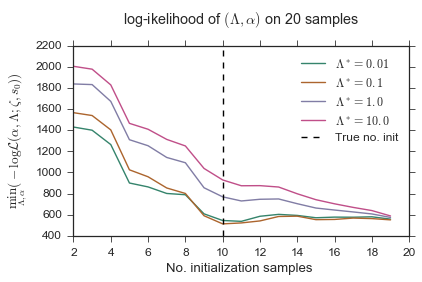

In [291]:
# plt.plot(t_samp, p, label=r'$\Lambda^*={}$'.format(nam))
for nam in names:
    plt.plot(t_samp, get_L(nam)[1:]+p, label=r'$\Lambda^*={}$'.format(nam))
plt.ylabel(r'$\min_{\Lambda,\alpha}(-\log {\cal L}(\alpha,\Lambda;\zeta,s_0))$')
plt.xlabel('No. initialization samples ')
plt.axvline(10, color='k',ls='--',label='True no. init')
plt.title(r'log-ikelihood of $(\Lambda,\alpha)$ on 20 samples'+'\n')
plt.legend(loc=0)
plt.tight_layout()